In [7]:

import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt

# FastF1 initialisieren und Daten laden
fastf1.Cache.enable_cache('cache')  # Zum Speichern und schnelleren Zugriff auf Renndaten
race = fastf1.get_session(2023, 'Monza', 'R')

# Daten für das Rennen laden
race.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']


In [8]:

# Rundenzeiten für beide Fahrer
laps_driver1 = race.laps.pick_drivers('VER')  # Max Verstappen
laps_driver2 = race.laps.pick_drivers('HAM')  # Lewis Hamilton

# Rundenzeiten als Liste für einfache Berechnungen und Plots
times_driver1 = laps_driver1['LapTime'].dt.total_seconds()
times_driver2 = laps_driver2['LapTime'].dt.total_seconds()

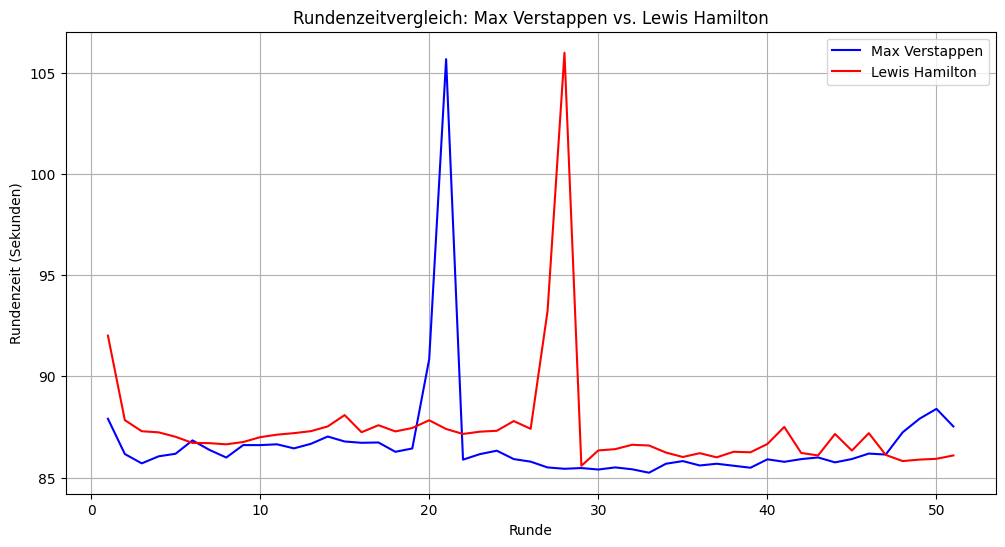

In [9]:
# Plot für den Rundenvergleich
plt.figure(figsize=(12, 6))
plt.plot(laps_driver1['LapNumber'], times_driver1, label='Max Verstappen', color='blue')
plt.plot(laps_driver2['LapNumber'], times_driver2, label='Lewis Hamilton', color='red')
plt.xlabel("Runde")
plt.ylabel("Rundenzeit (Sekunden)")
plt.title("Rundenzeitvergleich: Max Verstappen vs. Lewis Hamilton")
plt.legend()
plt.grid(True)
plt.show()

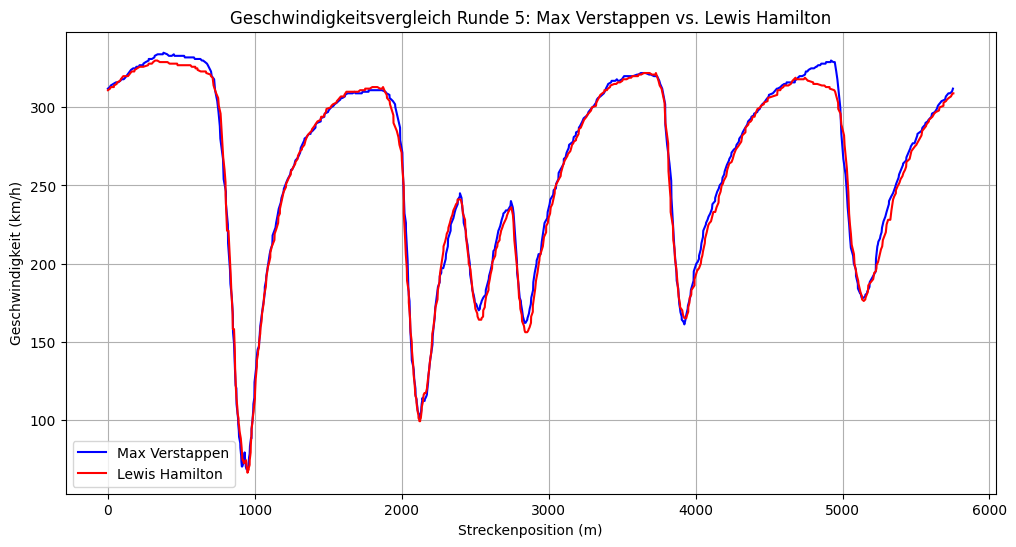

In [10]:
# Telemetrie für eine bestimmte Runde
lap_ver = laps_driver1[laps_driver1['LapNumber'] == 5].iloc[0]
lap_ham = laps_driver2[laps_driver2['LapNumber'] == 5].iloc[0]

telemetry_ver = lap_ver.get_telemetry()
telemetry_ham = lap_ham.get_telemetry()

# Geschwindigkeitsvergleich plotten
plt.figure(figsize=(12, 6))
plt.plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='Max Verstappen', color='blue')
plt.plot(telemetry_ham['Distance'], telemetry_ham['Speed'], label='Lewis Hamilton', color='red')
plt.xlabel("Streckenposition (m)")
plt.ylabel("Geschwindigkeit (km/h)")
plt.title("Geschwindigkeitsvergleich Runde 5: Max Verstappen vs. Lewis Hamilton")
plt.legend()
plt.grid(True)
plt.show()